# Pandas의 시각화 응용 1

참고

ex_0209.ipynb

In [61]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
# 시각화에서 사용할 한글 폰트 설정
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#### 데이터 프레임을 읽어 옵니다:

In [63]:
df = pd.read_csv('./data/data_population.csv', header='infer', encoding = 'ms949', na_values=[' '])  # encoding = 'euc-kr'

- 한글 인코딩 방법

    1. encoding='ms949'

    2. encoding='euc-kr'

- na_values=\[' '\]

    - 공백인 것을 결측치(NaN)으로 변환

In [64]:
df.head(3)

,Unnamed: 0,Province,City,Population,Households,PersInHou,Male,Female,GenderRatio
0,1,서울특별시,NaN,10078850,4197478,2.40,4962774,5116076,0.97
1,2,서울특별시,종로구,155695,72882,2.14,76962,78733,0.98
2,3,서울특별시,중구,126817,59614,2.13,63292,63525,1.00


In [65]:
df.shape

(281, 9)

#### 불필요한 컬럼과 결측치를 제거 합니다:

- Unnamed 는 불필요한 값, 이미 이는 데이터와 중복됨

=> 그래서, drop를 이용해 제거

- city가 비어있는 부분은 총합을 의미 => 제거

In [66]:
df.drop(columns=['Unnamed: 0'] ,inplace=True)
df.dropna(axis=0, inplace=True)

#### 데이터 프레임의 구조를 한눈에 살펴 봅니다:

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 280
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Province     263 non-null    object 
 1   City         263 non-null    object 
 2   Population   263 non-null    int64  
 3   Households   263 non-null    int64  
 4   PersInHou    263 non-null    float64
 5   Male         263 non-null    int64  
 6   Female       263 non-null    int64  
 7   GenderRatio  263 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 18.5+ KB


#### 데이터 프레임의 상단과 하단:

In [68]:
df.head()

,Province,City,Population,Households,PersInHou,Male,Female,GenderRatio
1,서울특별시,종로구,155695,72882,2.14,76962,78733,0.98
2,서울특별시,중구,126817,59614,2.13,63292,63525,1.00
3,서울특별시,용산구,235186,108138,2.17,114119,121067,0.94
4,서울특별시,성동구,298145,126915,2.35,148265,149880,0.99
5,서울특별시,광진구,362197,158769,2.28,177946,184251,0.97


In [69]:
df.tail()

,Province,City,Population,Households,PersInHou,Male,Female,GenderRatio
275,경상남도,함양군,40314,19229,2.10,19259,21055,0.91
276,경상남도,거창군,63069,27724,2.27,30582,32487,0.94
277,경상남도,합천군,48856,24193,2.02,23231,25625,0.91
279,제주특별자치도,제주시,454673,182709,2.49,227549,227124,1.00
280,제주특별자치도,서귀포시,160577,68769,2.34,81078,79499,1.02


#### 데이터 프레임의 컬럼 이름을 header에 저장합니다:

In [70]:
header = df.columns
header

Index(['Province', 'City', 'Population', 'Households', 'PersInHou', 'Male',
       'Female', 'GenderRatio'],
      dtype='object')

#### 조건부 슬라이싱 후 통계 메서드를 적용해 봅니다:

**충청남도와 충청북도의 전체 인구 집계:**

In [71]:
df2 = df[df.Province=='충청북도']
df2.Population.sum()

2414568

In [72]:
df3 = df[df.Province=='충청남도']
df3.Population.sum()

2671383

In [73]:
# OR 연산
# 충청북도 또는 충청남도
df4 = df[(df.Province=='충청북도') | (df.Province=='충청남도')]
df4.Population.sum()

5085951

- Group by

In [74]:
df.groupby("Province").Population.sum()

Province
강원도         1547166
경기도        18723822
경상남도        4428762
경상북도        3215695
광주광역시       1476974
대구광역시       2491137
대전광역시       1525656
부산광역시       3517491
서울특별시      10078850
울산광역시       1169768
인천광역시       2914271
전라남도        1902638
전라북도        2523806
제주특별자치도      615250
충청남도        2671383
충청북도        2414568
Name: Population, dtype: int64

**성비 기준으로 남자가 많고 (GenderRatio >1) 1인 가구가 많은 (PersInHou<2) 도시:**

In [75]:
# and 연산
df5 = df[(df.GenderRatio > 1) & (df.PersInHou < 2)]

In [76]:
df5

,Province,City,Population,Households,PersInHou,Male,Female,GenderRatio
62,인천광역시,옹진군,20825,11172,1.86,11715,9110,1.29
149,강원도,화천군,26790,13433,1.99,14989,11801,1.27
152,강원도,고성군,30066,15485,1.94,16109,13957,1.15
167,충청북도,괴산군,38027,19145,1.99,19309,18718,1.03
227,전라남도,신안군,43566,22248,1.96,22899,20667,1.11
253,경상북도,울릉군,10304,5365,1.92,5518,4786,1.15


In [77]:
my_labels = list(df5.City)
my_GenderRatio = list(df5.GenderRatio)

df6 = pd.DataFrame( {'GenderRatio':my_GenderRatio}, index = my_labels)
df6

,GenderRatio
옹진군,1.29
화천군,1.27
고성군,1.15
괴산군,1.03
신안군,1.11
울릉군,1.15


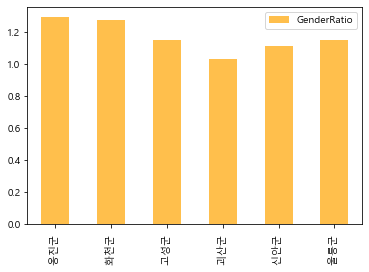

In [78]:
df6.plot.bar(color='orange', alpha=0.7)
plt.show()

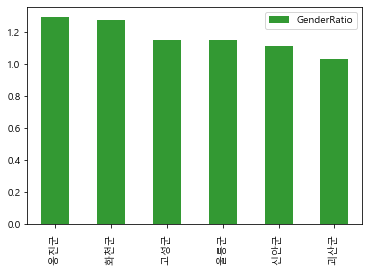

In [79]:
# 위 바 차트를 정렬한것
# 내림 차순
df7 = df6.sort_values(by='GenderRatio', ascending=False)
df7.plot.bar(color='green', alpha=0.8)
plt.show()

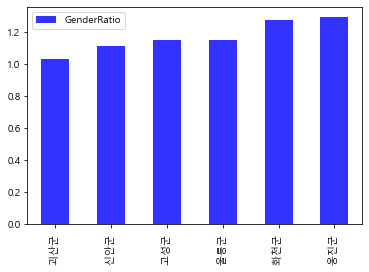

In [80]:
# 오름 차순
df7 = df6.sort_values(by='GenderRatio', ascending=True)
df7.plot.bar(color='blue', alpha=0.8)
plt.show()

In [85]:
type(df7)
type(df7.GenderRatio)

pandas.core.series.Series